In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('dataset.csv')

         Category                        Status  count
4          Blouse  Shipped - Delivered to Buyer    117
11         Bottom  Shipped - Delivered to Buyer    101
19   Ethnic Dress  Shipped - Delivered to Buyer    160
24          Saree  Shipped - Delivered to Buyer     15
29            Set  Shipped - Delivered to Buyer   6428
41            Top  Shipped - Delivered to Buyer   1196
53  Western Dress  Shipped - Delivered to Buyer   2909
64          kurta  Shipped - Delivered to Buyer   6375


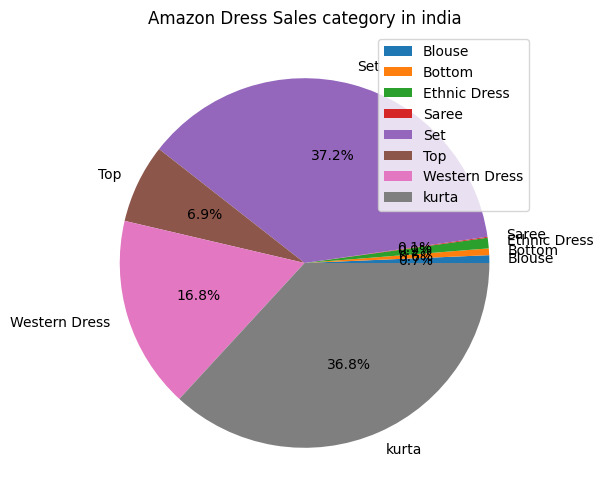

In [3]:
counts = df.groupby(['Category', 'Status']).size().reset_index(name='count')
delivered_counts = counts[counts['Status'] == 'Shipped - Delivered to Buyer']

print(delivered_counts)

plt.figure(figsize=(8, 6))
plt.pie(delivered_counts['count'], labels=delivered_counts['Category'], autopct='%1.1f%%')
plt.title('Amazon Dress Sales category in india')
plt. legend()
plt.show()

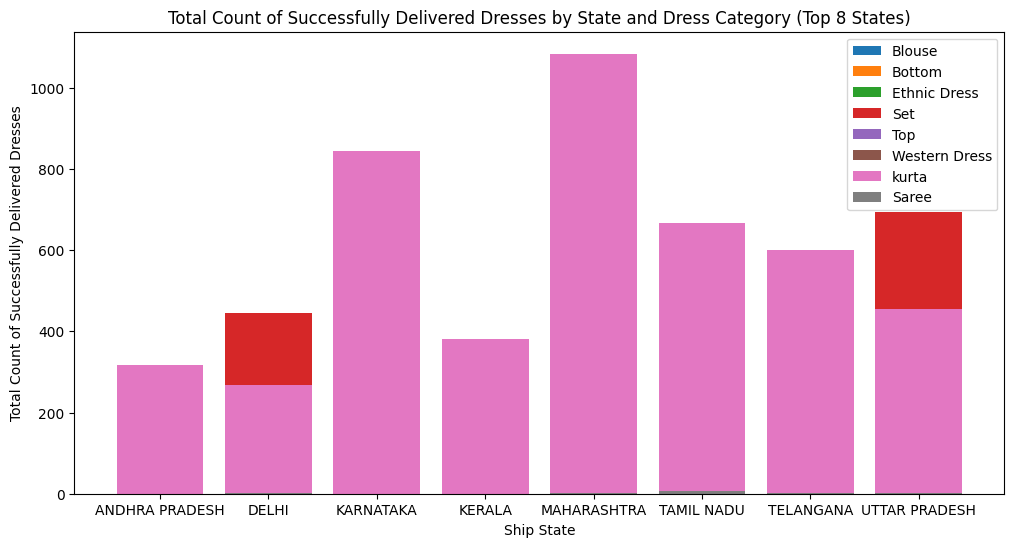

In [5]:
# Group the data by state, dress category, and delivery status, and calculate the count
counts = df.groupby(['ship-state', 'Category', 'Status']).size().reset_index(name='count')

# Filter the data to only include successfully delivered dresses
delivered_counts = counts[counts['Status'] == 'Shipped - Delivered to Buyer']

# Group the data by state and dress category, and calculate the total count of successfully delivered dresses for each group
delivered_by_state = delivered_counts.groupby(['ship-state', 'Category'])['count'].sum().reset_index()

# Get the top 5 states with the highest total count of successfully delivered dresses
top_5_states = delivered_by_state.groupby('ship-state')['count'].sum().nlargest(8).index

# Filter the data to only include the top 5 states
delivered_top_5_states = delivered_by_state[delivered_by_state['ship-state'].isin(top_5_states)]

# Create a bar chart of the total count of successfully delivered dresses by state and dress category
plt.figure(figsize=(12, 6))
for category in delivered_top_5_states['Category'].unique():
    category_data = delivered_top_5_states[delivered_top_5_states['Category'] == category]
    plt.bar(category_data['ship-state'], category_data['count'], label=category)
plt.xlabel('Ship State')
plt.ylabel('Total Count of Successfully Delivered Dresses')
plt.title('Total Count of Successfully Delivered Dresses by State and Dress Category (Top 8 States)')
plt.legend()
plt.show()

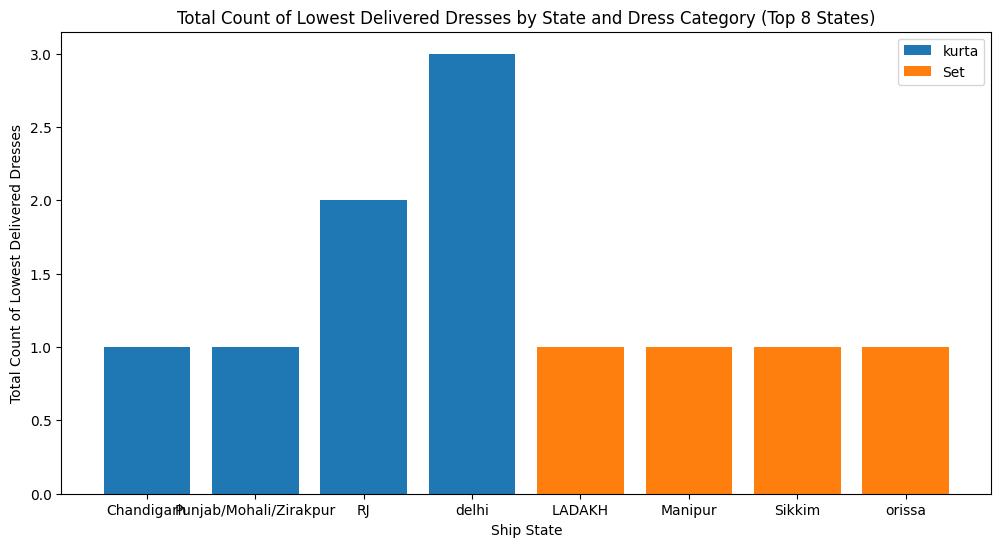

In [6]:
# Group the data by state, dress category, and delivery status, and calculate the count
counts = df.groupby(['ship-state', 'Category', 'Status']).size().reset_index(name='count')

# Filter the data to only include successfully delivered dresses
delivered_counts = counts[counts['Status'] == 'Shipped - Delivered to Buyer']

# Group the data by state and dress category, and calculate the total count of successfully delivered dresses for each group
delivered_by_state = delivered_counts.groupby(['ship-state', 'Category'])['count'].sum().reset_index()

# Get the top 5 states with the highest total count of successfully delivered dresses
top_5_states = delivered_by_state.groupby('ship-state')['count'].sum().nsmallest(8).index

# Filter the data to only include the top 5 states
delivered_top_5_states = delivered_by_state[delivered_by_state['ship-state'].isin(top_5_states)]

# Create a bar chart of the total count of successfully delivered dresses by state and dress category
plt.figure(figsize=(12, 6))
for category in delivered_top_5_states['Category'].unique():
    category_data = delivered_top_5_states[delivered_top_5_states['Category'] == category]
    plt.bar(category_data['ship-state'], category_data['count'], label=category)
plt.xlabel('Ship State')
plt.ylabel('Total Count of Lowest Delivered Dresses')
plt.title('Total Count of Lowest Delivered Dresses by State and Dress Category (Top 8 States)')
plt.legend()
plt.show()

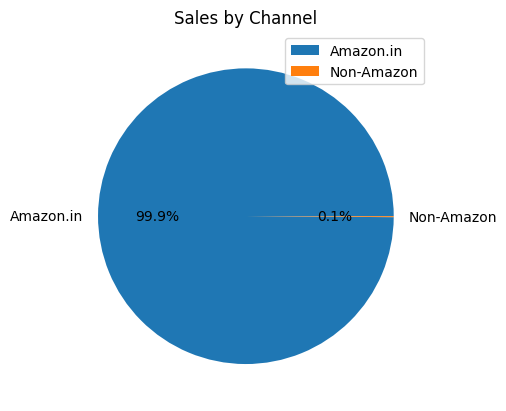

In [8]:
channel_counts = df['Sales Channel '].value_counts()

# Plot the counts as a pie chart
plt.pie(channel_counts, labels=channel_counts.index, autopct='%1.1f%%')
plt.title('Sales by Channel')
plt. legend()
plt.show()

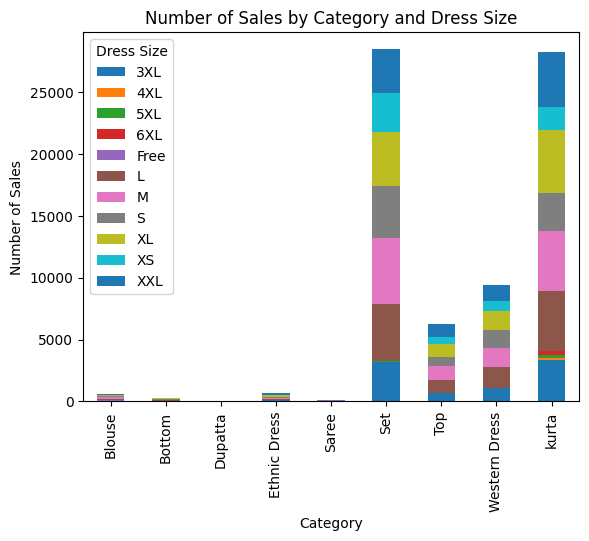

In [9]:
# Group the data by category and dress size and count the number of sales for each group
category_size_counts = df.groupby(['Category', 'Size'])['Qty'].count()

# Reshape the data to a pivot table
category_size_counts = category_size_counts.unstack()

# Create a stacked bar plot of the category and dress size counts
category_size_counts.plot(kind='bar', stacked=True)

# Add a title and labels to the plot
plt.title('Number of Sales by Category and Dress Size')
plt.xlabel('Category')
plt.ylabel('Number of Sales')
plt.legend(title='Dress Size')

# Display the plot
plt.show()

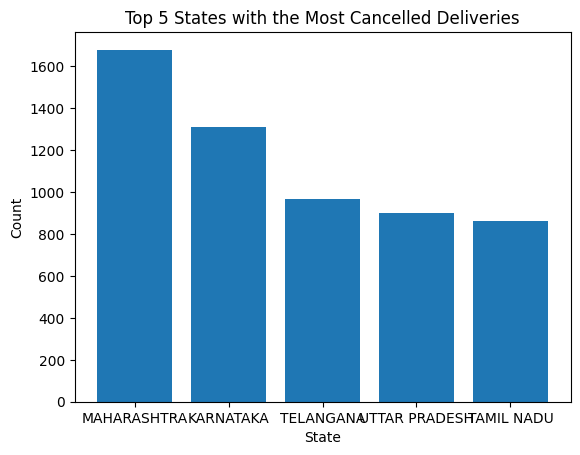

In [10]:
# Group the data by state and delivery status and count the number of cancelled deliveries for each state
state_cancel_counts = df[df['Status'] == 'Cancelled'].groupby('ship-state')['Status'].count()

# Sort the counts in descending order and select the top 5 states
top_states = state_cancel_counts.sort_values(ascending=False).head(5)

# Create a bar plot of the top 5 states with the most cancelled deliveries
plt.bar(top_states.index, top_states.values)

# Add a title and labels to the plot
plt.title('Top 5 States with the Most Cancelled Deliveries')
plt.xlabel('State')
plt.ylabel('Count')

# Display the plot
plt.show()
